# Training the dataset using different models

In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# importing GridSearchCV to identify the best parameters
from sklearn.model_selection import GridSearchCV

# importing libraries for splitting datatset
from sklearn.model_selection import train_test_split

# importing libraries for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score

# importing libraries for GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

# importing libraries for XGBoost CLassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [3]:
# importing the datasets
csv_data = pd.read_csv('train_values.csv')
labels=pd.read_csv('train_labels.csv')
csv_data['damage_grade']=labels['damage_grade']
csv_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
all_columns = list(csv_data)
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage','count_families']
categorical_columns = [col for col in all_columns if col not in numerical_columns and col != "building_id"]

# Converting non-numeric categorical columns to numeric
for column in categorical_columns:
    csv_data[column] = csv_data[column].astype('category').cat.codes  


In [8]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int8
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null int8
foundation_type                           260601 non-null int8
roof_type                                 260601 non-null int8
ground_floor_type                         260601 non-null int8
other_floor_type                          260601 non-null int8
position                                  260601 non-null int8


In [11]:
# splitting the dataset into train and test set
X=csv_data
X=X.drop(["damage_grade","building_id"],axis=1)
Y=csv_data["damage_grade"]
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.20) # keeping the test size as 20%

## Using multivariate decision tree for only the numerical columns

In [12]:
Y = pd.DataFrame(Y_train)
X = pd.DataFrame(X_train[numerical_columns]) 

In [31]:
dectree = DecisionTreeClassifier(max_depth = 6)  
dectree.fit(X,Y)
test=pd.DataFrame(X_test[numerical_columns])
test_value=pd.DataFrame(Y_test)
y_pred = dectree.predict(test)

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6476851940676502



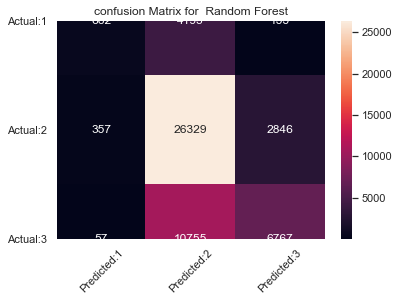

In [43]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(test, test_value))
print()

# Plot the Confusion Matrix
cm=confusion_matrix(test_value, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (6,4))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for Decision Tree")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [ ]:
print("classification report for Decision tree :\n\n",metrics.classification_report(Y_test, y_pred))

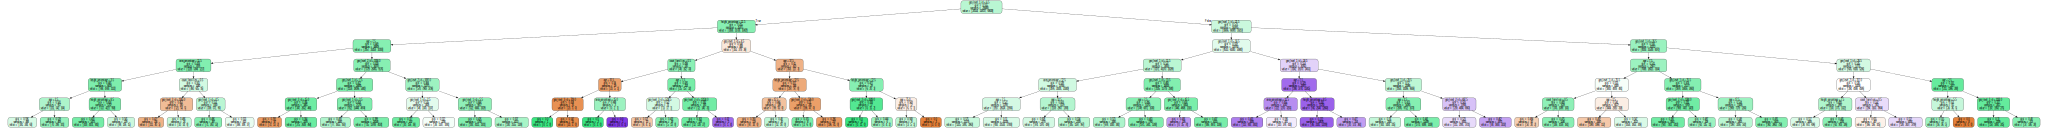

In [33]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Using RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators = 150) # with 150 trees
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
# print the accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, rf_pred))
print(" \n")

Accuracy: 0.7211488651407302
 



In [49]:
print("classification report for Random Forest :\n\n",metrics.classification_report(Y_test, rf_pred))

classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.66      0.48      0.56      5022
           1       0.73      0.83      0.77     29724
           2       0.72      0.61      0.66     17375

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.72     52121



In [ ]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Using GradientBoostingClassifier

This is a type of Boosting Ensemble method

In [50]:
GBC=GradientBoostingClassifier(n_estimators=100)
GBC.fit(X_train,Y_train)
GBC_pred=GBC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, GBC_pred))
print(" \n")
print("classification report for Gradient Boosting :\n\n",metrics.classification_report(Y_test, GBC_pred))

Accuracy: 0.7204965369045107
 

classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.66      0.48      0.55      5022
           1       0.73      0.83      0.77     29724
           2       0.72      0.61      0.66     17375

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121



In [ ]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, GBC_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for Gradient Boosting")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Using XGBClassifier

This literally means extra gradient boosting classifier. It is an efficient model.

In [21]:
XGB = XGBClassifier()

In [22]:
XGB.fit(X_train,Y_train)
XGB_pred=XGB.predict(X_test)
metrics.accuracy_score(Y_test, XGB_pred)

0.7295907599623952

In [23]:
print(metrics.classification_report(Y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55      5031
           1       0.72      0.85      0.78     29508
           2       0.76      0.60      0.67     17582

    accuracy                           0.73     52121
   macro avg       0.72      0.64      0.67     52121
weighted avg       0.73      0.73      0.72     52121



In [ ]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, XGB_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

### Since XGB CLassifier needs parameter tuning to obtain best results, I used GridSearchCV to obtain an optimal value of the parameters in order to prevent overfitting of data

## Using GridSearchCV to obtain the optimal value of the parameters

In [33]:
# the list of parameters to be tested
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch = GridSearchCV(estimator = XGBClassifier(nthread=4),param_grid = param_test,n_jobs=4)
gsearch.fit(X_train,Y_train)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [38]:
gsearch.cv_results_

{'mean_fit_time': array([ 42.65136447,  46.90251679,  45.34735231,  76.16213832,
         73.57698445,  73.89200306, 108.71520715, 107.82367735,
        106.41061625, 138.43942556, 133.3022655 , 112.1642796 ]),
 'std_fit_time': array([ 1.96419837,  1.90175054,  1.28188604,  3.16641782,  2.32023725,
         3.07928363,  3.80373831,  2.15703983,  2.60103424,  5.66684524,
         2.64732971, 19.44116114]),
 'mean_score_time': array([0.38682747, 0.35766292, 0.3524745 , 0.57276373, 0.53391228,
        0.55662951, 0.81673894, 0.81271181, 0.76863713, 0.98705697,
        0.95949731, 0.81905303]),
 'std_score_time': array([0.03263053, 0.04408456, 0.02694349, 0.06011362, 0.05384039,
        0.06574043, 0.0446801 , 0.14604168, 0.04465837, 0.08186863,
        0.04865068, 0.20237389]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_

In [40]:
gsearch.best_params_

{'max_depth': 9, 'min_child_weight': 1}

#### Now let us fit the model again using the parameters identified 

In [51]:
model = XGBClassifier(max_depth=9,min_child_weight=1,nthread=4)
model.fit(X_train,Y_train)
res_=model.predict(X_test)
metrics.accuracy_score(Y_test, res_)

0.7251971374302105

In [ ]:
print(metrics.classification_report(Y_test, res_))

In [ ]:
# It is clear that there has been a significant increase in the overall accuracy of the model

In [ ]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, res_)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Let us now see which category of the features related to materials suffered least damage

We will do this by counting number of buildings that suffered a specific damage grade

In [14]:
df=pd.read_csv('train_values.csv')
lab=pd.read_csv('train_labels.csv')
df['damage_grade']=lab['damage_grade']
for feat in categorical_columns:
    grouped = df.groupby(feat)
    print(grouped['damage_grade'].agg([np.sum, np.mean, np.std]))


                        sum      mean       std
count_floors_pre_eq                            
1                     82587  2.042160  0.695668
2                    350715  2.239231  0.585498
3                    133298  2.396713  0.574951
4                     11484  2.117257  0.603546
5                      4749  2.114426  0.572414
6                       388  1.856459  0.587096
7                        72  1.846154  0.586626
8                         2  2.000000       NaN
9                         1  1.000000       NaN
                           sum      mean       std
land_surface_condition                            
n                        79988  2.251407  0.576279
o                        19036  2.289081  0.591892
t                       484272  2.234170  0.618073
                    sum      mean       std
foundation_type                            
h                  3049  2.105663  0.767711
i                 15375  1.453351  0.538175
r                510633  2.329573  0.5645

We can compile the above imformation, to understand what category of features result in least damage

land_surface_condition = t

foundation_type = i

roof_type=x

ground_floor_type = x

other_floor_type = x

position = j

plan_configuration = c

has_superstructure = cement_mortar_brick / rc_engineered


### Considering the above features to be ideal, let us train a model only considering the materials and structure and predict the damage_grade for this "ideal" case

In [15]:
ideal = pd.DataFrame({'land_surface_condition':['t'],
                      'foundation_type':['i'],
                       'roof_type':['x'],
                       'ground_floor_type':['x'],
                     'other_floor_type':['x'],
                     "has_superstructure_adobe_mud":[0],
                     'has_superstructure_mud_mortar_stone':[0],
                     'has_superstructure_stone_flag':[0],
                      'has_superstructure_cement_mortar_stone':[0],
                      'has_superstructure_mud_mortar_brick':[0],
                      'has_superstructure_cement_mortar_brick':[1],
                    'has_superstructure_timber':[0],
                    'has_superstructure_bamboo':[0],
                      'has_superstructure_rc_non_engineered':[0],
                      'has_superstructure_rc_engineered':[1],
                      'has_superstructure_other':[0]
                     })
ideal=pd.get_dummies(ideal)
ideal.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,land_surface_condition_t,foundation_type_i,roof_type_x,ground_floor_type_x,other_floor_type_x
0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1


In [16]:
columns=['land_surface_condition',
                      'foundation_type',
                       'roof_type',
                       'ground_floor_type',
                     'other_floor_type',
                     
                     "has_superstructure_adobe_mud",
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_stone_flag',
                      'has_superstructure_cement_mortar_stone',
                      'has_superstructure_mud_mortar_brick',
                      'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber',
                    'has_superstructure_bamboo',
                      'has_superstructure_rc_non_engineered',
                      'has_superstructure_rc_engineered',
                      'has_superstructure_other']
train = df[columns].copy()
train=pd.get_dummies(train)
train.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
damage_grade=df['damage_grade']

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(train,damage_grade,test_size = 0.20)
model = XGBClassifier(max_depth=9,min_child_weight=1,nthread=4)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
metrics.accuracy_score(Y_test, pred)

In [18]:
for col in train.columns:
    if col not in ideal.columns:
        ideal[col]=0

In [ ]:
pred_ideal=model.predict(ideal)
pred_ideal

# Construct your own building

Extending the knowledge obtained above, we can predict the damage that will be suffered by the user's  building depending on the type of materials used in the construction

In [11]:
print("Let us predict the damage grade of your building in case of earthquake \n")
print("Enter the etails according to the instruction provided \n")
a=input("Enter land surface condition- n,o,t \n")
b=input("Enter type of foundation- h,i,r,u,w \n")
c=input("Enter roof type -n,q,x \n")
d=input("Enter ground floor type -f,m,v,x,z \n")
e=input("Enter other floor type -j,q,s,x \n")
f=input("Enter type of superstructure - 0 for adobe_mud, 1 for mud_mortar_stone, 2 for stone_flag, \
          3 for cement_mortar_stone, 4 for mud_mortar_brick, 5 for cement_mortar_brick, \
          6 for timber, 7 for bamboo and 8 for others \n")
g=input("Is the superstructure rc engineered? 0 for False, 1 for True")


Let us predict the damage grade of your building in case of earthquake 

Enter the etails according to the instruction provided 

Enter land surface condition- n,o,t 
n
Enter type of foundation- h,i,r,u,w 
w
Enter roof type -n,q,x 
q
Enter ground floor type -f,m,v,x,z 
f
Enter other floor type -j,q,s,x 
j
Enter type of superstructure - 0 for adobe_mud, 1 for mud_mortar_stone, 2 for stone_flag,           3 for cement_mortar_stone, 4 for mud_mortar_brick, 5 for cement_mortar_brick,           6 for timber, 7 for bamboo and 8 for others 
1
Is the superstructure rc engineered? 0 for False, 1 for True0


In [12]:

new_build = pd.DataFrame({'land_surface_condition':[a],
                      'foundation_type':[b],
                       'roof_type':[c],
                       'ground_floor_type':[d],
                     'other_floor_type':[e],
                     "has_superstructure_adobe_mud":[0 if (f==1) else 1],
                     'has_superstructure_mud_mortar_stone':[1 if (f==1) else 0],
                     'has_superstructure_stone_flag':[1 if (f==2) else 0],
                      'has_superstructure_cement_mortar_stone':[1 if (f==3) else 0],
                      'has_superstructure_mud_mortar_brick':[1 if (f==4) else 0],
                      'has_superstructure_cement_mortar_brick':[1 if (f==5) else 0],
                    'has_superstructure_timber':[1 if (f==6) else 0],
                    'has_superstructure_bamboo':[1 if (f==7) else 0],
                      'has_superstructure_rc_non_engineered':[1 if (g==0) else 0],
                      'has_superstructure_rc_engineered':[1 if (g==1) else 0],
                      'has_superstructure_other':[1 if (f==8) else 0]
                     })
new_build=pd.get_dummies(new_build)
for col in train.columns:
    if col not in new_build.columns:
        new_build[col]=0
pred_damage=model.predict(new_build)